# UECS3453 Data Mining
# Assignment 2 
## Chong Woon Yung
## 1507838


### Introduction
Fashion-MNIST is a dataset consists of total 70000 images. It splits into 60000 training set and 10000 test set. Both training and testing data represent a 28 x 28 pixel image and comes with only one label including
1. T-shirt
2. Trouser
3. Pullover
4. Dress
5. Coat
6. Sandal
7. Shirt
8. Sneaker
9. Bag
10. Ankle boot

This assignment cover four classifiers using sklearn, perform prediction and show the confusion matrix.

Libraries I use for this project:

In [2]:
import mnist_reader
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
#classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn import tree

#### Read dataset
Git clone the repository(https://github.com/zalandoresearch/fashion-mnist.git).

We can use the mnist_reader provided by fashion-MNIST to read the dataset. Code as cell below.

Data dictionary
- X_train contains 60000 datasets, each data set is a 28x28 pixel image.
- y_train contains 60000 datasets which represent the X_train label.
- X_test is unseen data to let the trained classifier to predict the outcome.
- y_test represent the label for X_test.

Labels is for the confusion matrix chart showing the lable name instead of number 0-9.

In [4]:
X_train, y_train = mnist_reader.load_mnist('../data/fashion/', kind='train')
X_test, y_test = mnist_reader.load_mnist('../data/fashion', kind='t10k')

labels = ['T-shirt', 'Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

#### Data visualize

An example of image in X_train. The dataset is in 784 pixel, therefore we need to reshape it into 28 x 28.

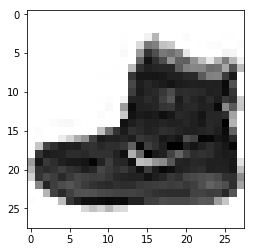

In [10]:
#showing 1st image
x_1 = X_train[0].reshape(28,28)
plt.imshow(x_1,cmap='gray_r')
plt.show()

Categorize images into respective label. 

tshirt =  (6000, 784)
trouser =  (6000, 784)
pullover =  (6000, 784)
dress =  (6000, 784)
coat =  (6000, 784)
sandal =  (6000, 784)
shirt =  (6000, 784)
sneaker =  (6000, 784)
bag =  (6000, 784)
boot =  (6000, 784)


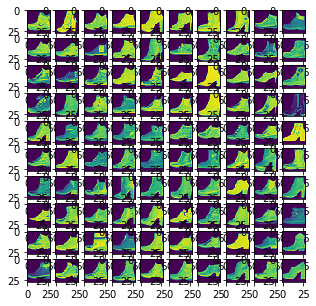

In [8]:
#Convert data in array and save in z, which z consists data with label.
x = np.array(X_train)
y = np.array(y_train)
z = [x,y]

#find the correct lable and save accordingly
t_shirt = z[1]==0
trouser = z[1]==1
pullover = z[1]==2
dress = z[1]==3
coat = z[1]==4
sandal = z[1]==5
shirt = z[1]==6
sneaker = z[1]==7
bag = z[1]==8
boot = z[1]==9

#Each label has 6000 item.
print("tshirt = ", z[0][t_shirt].shape)
print("trouser = ", z[0][trouser].shape)
print("pullover = ", z[0][pullover].shape)
print("dress = ", z[0][dress].shape)
print("coat = ", z[0][coat].shape)
print("sandal = ", z[0][sandal].shape)
print("shirt = ", z[0][shirt].shape)
print("sneaker = ", z[0][sneaker].shape)
print("bag = ", z[0][bag].shape)
print("boot = ", z[0][boot].shape)

#save each label in variable
t1 = z[0][t_shirt]
t2 = z[0][trouser]
t3 = z[0][pullover]
t4 = z[0][dress]
t5 = z[0][coat]
t6 = z[0][sandal]
t7 = z[0][shirt]
t8 = z[0][sneaker]
t9 = z[0][bag]
t10 = z[0][boot]

#show ankle boot
fig = plt.figure(figsize=(5,5))
for i in range(0,100):
    x_2 = t10[i].reshape(28,28)
    fig.add_subplot(10,10,i+1)
    plt.imshow(x_2)
plt.show()   

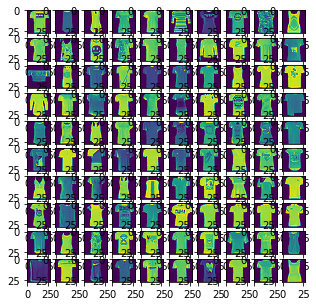

In [5]:
#show T-shirt
fig = plt.figure(figsize=(5,5))
for i in range(0,100):
    x_2 = t1[i].reshape(28,28)
    fig.add_subplot(10,10,i+1)
    plt.imshow(x_2)
plt.show()  

### Develop Classifiers

Three classifiers are used in this project
1. KNeighbor Classifier
2. MLP Classifier
3. SVC Classifier
4. Decision Tree Classifier

#### KNeighbor Classifier

Wall time: 35 s
accuracy using traditional way =  85.54
accuracy using accuracy_score method =  0.8554


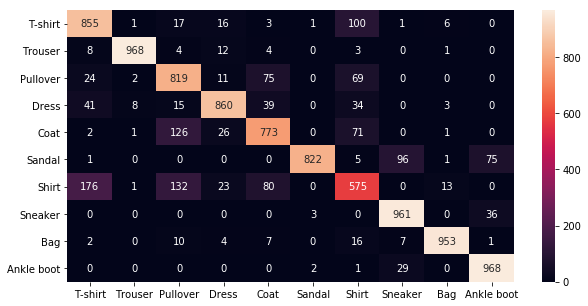

In [6]:
#KNeighbor Classifier using parameter n_neighbor = 5

neigh = KNeighborsClassifier(n_neighbors = 5)
%time neigh.fit(X_train, y_train)

k_predict = neigh.predict(X_test)
k_correct = np.sum(k_predict == y_test)
k_total = X_test.shape[0]
k_accuracy = k_correct/k_total*100
#print(k_correct)
#print(k_total)
print('accuracy using traditional way = ', k_accuracy)
print('accuracy using accuracy_score method = ', accuracy_score(y_test,k_predict))
k_array = confusion_matrix(y_test, k_predict)
df_cm = pd.DataFrame(k_array, index = [i for i in labels],
                  columns = [i for i in labels], dtype='float64')
plt.figure(figsize = (10,5))
sn.heatmap(df_cm, annot=True,fmt='g')
plt.show()

#### MLP Classifier

Wall time: 5min 49s
accuracy using traditional way =  88.32
accuracy using accuracy_score method =  0.8832


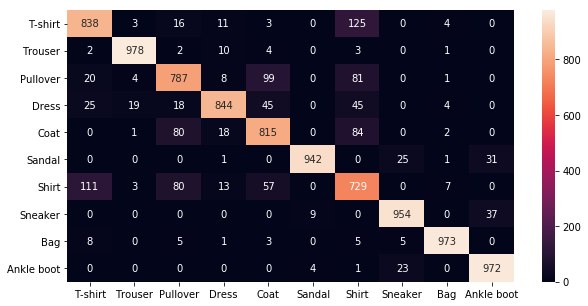

In [7]:
#MLPClassifier using parameter hidden_layer_sizes=256,128,64

MLP = MLPClassifier(hidden_layer_sizes=(256,128,64))
%time MLP.fit(X_train, y_train)

MLP_predict = MLP.predict(X_test)
MLP_correct = np.sum(MLP_predict == y_test)
MLP_total = X_test.shape[0]
MLP_accuracy = MLP_correct/MLP_total*100
#print(MLP_correct)
#print(MLP_total)
print('accuracy using traditional way = ',MLP_accuracy)
print('accuracy using accuracy_score method = ',accuracy_score(y_test,MLP_predict))
MLP_array = confusion_matrix(y_test, MLP_predict)
df_cm = pd.DataFrame(MLP_array, index = [i for i in labels],
                  columns = [i for i in labels], dtype='float64')
plt.figure(figsize = (10,5))
sn.heatmap(df_cm, annot=True,fmt='g')
plt.show()

#### SVC Classifier

Wall time: 10min 34s
accuracy using traditional way =  87.22999999999999
accuracy using accuracy_score method =  0.8723


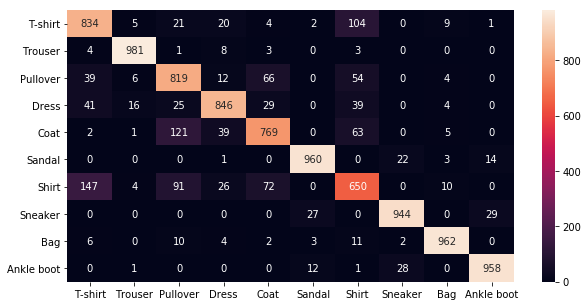

In [8]:
#SVC using parameter kernel = 'poly'

s = svm.SVC(kernel = 'poly')
#train data
%time s.fit(X_train, y_train)

#calculate the accuracy
s_predict = s.predict(X_test)
s_correct = np.sum(s_predict == y_test)
s_total = X_test.shape[0]
s_accuracy = s_correct/s_total*100
#print(s_correct)
#print(s_total)
print('accuracy using traditional way = ',s_accuracy)
print('accuracy using accuracy_score method = ',accuracy_score(y_test,s_predict))

#print the table
s_array = confusion_matrix(y_test, s_predict)
df_cm = pd.DataFrame(s_array, index = [i for i in labels],
                  columns = [i for i in labels], dtype='float64')
plt.figure(figsize = (10,5))
sn.heatmap(df_cm, annot=True,fmt='g')
plt.show()

#### DecisionTree Classifier

Wall time: 8.33 s
accuracy using traditional way =  79.35
accuracy using accuracy_score method =  0.7935


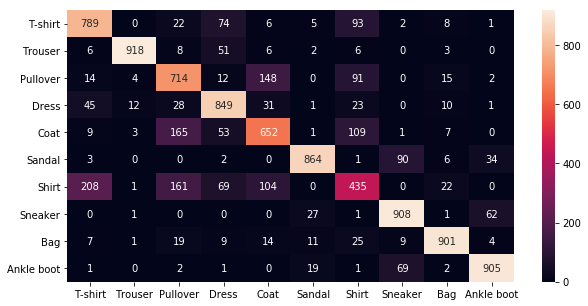

In [6]:
#DecisionTreeClassifier using parameter max_depth = 10, splitter='random'

dt = tree.DecisionTreeClassifier(max_depth=10,splitter='random')
#train data
%time dt.fit(X_train, y_train)

#calculate the accuracy
dt_predict = dt.predict(X_test)
dt_correct = np.sum(dt_predict == y_test)
dt_total = X_test.shape[0]
dt_accuracy = dt_correct/dt_total*100
#print(dt_correct)
#print(dt_total)
print('accuracy using traditional way = ',dt_accuracy)
print('accuracy using accuracy_score method = ',accuracy_score(y_test,dt_predict))

#print the table
dt_array = confusion_matrix(y_test, dt_predict)
df_cm = pd.DataFrame(dt_array, index = [i for i in labels],
                  columns = [i for i in labels], dtype='float64')
plt.figure(figsize = (10,5))
sn.heatmap(df_cm, annot=True,fmt='g')
plt.show()

### Benchmark


| Classifier        | Time           | Accuracy mean(%)  |
| ------------- |:-------------:| -----:|
| KNeighbor      | 35s | 85.54 |
| MLB      | 5min 49s      |   88.32 |
| SVC | 10min 34s      |   87.2299 |
| DecisionTree | 8.33 s      |   79.35 |



### Observation and comment
From the graphs above we can see that the accuracy of "Shirt" and "T-shirt" is lowest. I think this is because the form of shirt is similar to T-shirt, moreover some shirt or T-shirt collar is not that obvious when it show in 28 x 28 pixel image. In contrast, "Trouser" has the highest accuray.

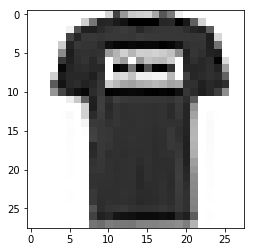

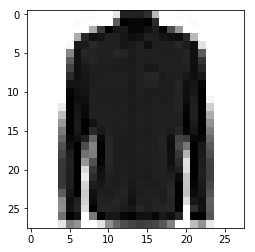

In [22]:
plt.imshow(t1[0].reshape(28,28),cmap='gray_r')
plt.show()
plt.imshow(t7[3].reshape(28,28),cmap='gray_r')
plt.show()

The benchmark table shows MLB has the highest accurary and DecisionTree has the lowest. SVC has the longest training time and DecisionTree has the shortest. 

Different models show different accuracy and duration of tranning. However, the longer time it takes, does not represent the higher accuracy. For example, MLB takes 5min 49sec to train but it has the highest accuracy. Whereas, SVC used 10min 34sec to train, its accuracy is sencond place. 

### Suggestion to improve
Given more time
- try more different parameter to tune the accuracy of each classifier.
    - due to the time constraint, I was able to play with a few parameter.
    - find out some useful parameter and the tuning method
- try more classfier like 
    - ExtraTreeClassifier
    - SGDClassifier
    - RandomForestClassifier
    - GradientBoostingClassifier
- find out the incorrect dataset and find the reason why it does not match
- understand each classifier, how does it works.
    - for example, KNeighbor is use the nearest target and the parameter n_neighbor is the number of target
    -would like to find our more on MLP, because it's using neural network
- use some other machine learning libraries to load data
    - Kaggle
    - keras
    -tensorflow
- use some other progromming language to load data
- explore on tensorflow framework
    - there is a 3D visualization file in the fashion-MNIST repositary, but it required tensorflow to run
    - tutorial machine learning provided by google cloud platform and kaggle about fashion-MNIST is using tensorflow
- technique to improve "Shirt" accuracy
    - since it has the lowest accuracy, would like to find out the answer
